Przygotowanie

In [ ]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 16.0 MB/s 
     |████████████████████████████████| 362 kB 58.2 MB/s 
     |████████████████████████████████| 1.2 MB 54.0 MB/s 
     |████████████████████████████████| 197 kB 60.0 MB/s 
     |████████████████████████████████| 4.2 MB 55.1 MB/s 
     |████████████████████████████████| 60 kB 4.6 MB/s 
     |████████████████████████████████| 140 kB 46.3 MB/s 
     |████████████████████████████████| 86 kB 3.8 MB/s 
     |████████████████████████████████| 212 kB 71.5 MB/s 
     |████████████████████████████████| 1.1 MB 63.0 MB/s 
     |████████████████████████████████| 596 kB 66.9 MB/s 
     |████████████████████████████████| 127 kB 4.6 MB/s 
     |████████████████████████████████| 94 kB 5.0 MB/s 
     |████████████████████████████████| 271 kB 79.1 MB/s 
     |████████████████████████████████| 144 kB 76.2 MB/s 
     |████████████████████████████████

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/dataset_Proj')
path = Path('/content/drive/My Drive/dataset_Proj')

Mounted at /content/drive


Stworzenie danych treningowych

In [ ]:
klasy = 'Sport', 'Cruiser', 'Naked'
path = Path('treningowe')
if not path.exists():
  path.mkdir()
  for o in klasy:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {o} Motorcycles', max_images=350)
    download_images(dest, urls=urls)

In [ ]:
klasyCars = 'Cars'
destCars = (path/'Cars')
destCars.mkdir(exist_ok=True)
urlsCars = search_images_ddg(f'Cars', max_images=350)
download_images(destCars, urls=urlsCars)

Trenowanie modelu

In [ ]:
classes = ['Car', 'Cruiser bike', 'Naked bike', 'Sport bike']

In [ ]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(256)
)

In [ ]:
data = data.new(
    item_tfms=RandomResizedCrop(230, min_scale=0.35),
    batch_tfms=aug_transforms(max_rotate=1.6)
)
dls = data.dataloaders(path, bs = 32, num_workers = 0)

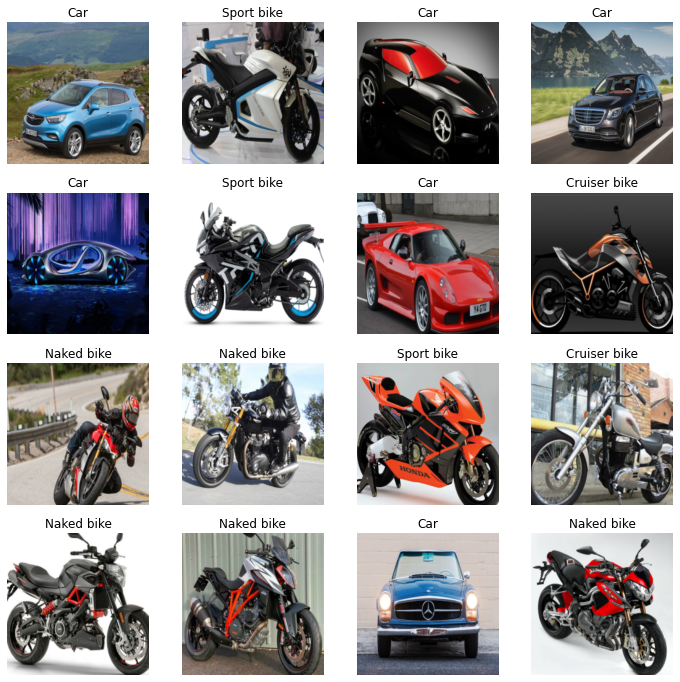

In [ ]:
dls.valid.show_batch(max_n=16, nrows=4)

In [ ]:
learn = vision_learner(dls, vgg19_bn, metrics=accuracy)

In [ ]:
from keras.callbacks import EarlyStopping
c1 = EarlyStoppingCallback(patience=5, monitor='valid_loss')
c2 = SaveModelCallback(monitor='valid_loss')

In [ ]:
learn.fit(30, cbs=[c1,c2])

epoch,train_loss,valid_loss,accuracy,time
0,1.032696,0.405950,0.835616,01:15
1,0.808892,0.343378,0.863014,01:15
2,0.699575,0.394645,0.849315,01:14
3,0.635086,0.370272,0.876712,01:14
4,0.581842,0.395868,0.894977,01:15
5,0.516806,0.245395,0.913242,01:14
6,0.479079,0.230722,0.931507,01:14
7,0.427016,0.243205,0.926941,01:15
8,0.416866,0.242519,0.931507,01:14
9,0.371835,0.289919,0.913242,01:15


Better model found at epoch 0 with valid_loss value: 0.4059503674507141.
Better model found at epoch 1 with valid_loss value: 0.3433780074119568.
Better model found at epoch 5 with valid_loss value: 0.2453947216272354.
Better model found at epoch 6 with valid_loss value: 0.23072189092636108.
No improvement since epoch 6: early stopping


In [ ]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [ ]:
learn.export(fname='model.pkl')